# Problema do Caixeiro Viajante(TSP) com ACO
Na indiústria de equipamentos eletrônicos há um problema bastante usual que é a determinação da sequência de furação de uma placa de circuito impresso (*Printed Circuit Board* - PCB). Para agilizar a produção em massa de placas é necessário que o processo de furação seja o mais rápido possível e em uma placa com alta densidade de furos, o somatório dos tempos de deslocamento da furadeira entra cada furo pode ser muito significativo. Assim, é necessário otimizar o trajeto da furadeira de maneira tal a apassar poro todos os furos uma única vez com o menor deslocamento possível.  

Este problema real pode ser tratado como o problema clássico do Caixeiro Viajante(TSP) simétrico(a distância entre os pontos não depende do sentido de deslocamento).  

Com base na planilha que contém a localização de cada furo(**planilha-pcb-2017.xls**)será implementado em Python utilizando a lib Pants(https://github.com/rhgrant10/Pants)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pants
import math
import random
import numpy as np
import time
from datetime import timedelta

Importando os dados do arquivo para gerar o mundo que o algortimo se propoe a resolver.  
Esse mundo é composto dos *nodes*(furos da placa) e da função de custo que deve aceitar dois nodes e calcular o custo associado a eles.

In [2]:
#Leitura dos dados
nodes = np.genfromtxt('planilha-pcb-2017.txt',delimiter=',').tolist()

#Função de custo é a própria distância euclideana
def euclidean(a, b):
    return math.sqrt(pow(a[1] - b[1], 2) + pow(a[0] - b[0], 2))

#Definição do Mundo
world = pants.World(nodes, euclidean)

Para definir os parâmetros do ACO, esta lib instancia um solver. Neste solver podemos passar diversos parametros:  
- **alpha**  -  importancia relativa colocada nos feromonios; default=1
- **beta**   -  impotancia relativa colocada nas distancias; default=3
- **limit**  -  numero de iterações; default=100
- **rho**    -  fator de evaporação do feromonio (0 <= P <= 1); default=0.8
- **elite**  -  fator de influencia do feronomio deixado pela elite; default=0.5
- **Q**      -  total da capacidade de feromonio de cada formiga (Q > 0); default=1
- **t0**     -  quantidade total de feromônio em cada caminho (T > 0);default=0.01
- **count**  -  numero de formigas (N > 0); default=10

Escolheu-se utilizar os parametros: alpha, beta, limit, rho, count para gerar as metricas de performance do algoritmo.

## Tamanho da população
Variou-se o tamanho da população e um intervalo determinado para identificar o melhor distancia e o tempo gasto para rodar o algoritmo.


In [3]:
N = np.arange(1,110,1)
columns = "{!s:<25}\t{:<50}\t{:<25}"
divider = "-" * (25 + 50 + 25)
header = columns.format("Formigas","Tempo", "Distancia")
columns = columns.replace('<', '>', 1)

print()
print(header)
print(divider)

results_pop = []
for n in N:
    start_time = time.time()
    solver = pants.Solver(count = n, limit=10)
    solution = solver.solve(world)
    end_time = time.time() - start_time
    results_pop.append((end_time,solution))
    print(columns.format(n, end_time, solution.distance))


Formigas                 	Tempo                                             	Distancia                
----------------------------------------------------------------------------------------------------
                        1	18.9325270652771                                  	3352.531029297634        
                        2	20.771795511245728                                	3421.3160151005254       
                        3	17.38925528526306                                 	3193.7379864647437       
                        4	19.886375427246094                                	3411.278010287388        


KeyboardInterrupt: 

## Quantidade de iterações

In [ ]:
N = np.arange(100,2010,200)
columns = "{!s:<25}\t{:<50}\t{:<25}"
divider = "-" * (25 + 50 + 25)
header = columns.format("Iterações","Tempo", "Distancia")
columns = columns.replace('<', '>', 1)

print()
print(header)
print(divider)

results_pop = []
for n in N:
    start_time = time.time()
    solver = pants.Solver(count = 60, limit = n)
    solution = solver.solve(world)
    end_time = time.time() - start_time
    results_pop.append((end_time,solution))
    print(columns.format(n, end_time, solution.distance))


Iterações                	Tempo                                             	Distancia                
----------------------------------------------------------------------------------------------------
                      100	211.13552689552307                                	3154.6728875271388       
                      300	514.808064699173                                  	3248.26614380516         
                      500	955.7437376976013                                 	3201.5902722969076       
                      700	1436.8970351219177                                	3133.2391233231815       


## Tempo do feromonio

In [ ]:
N = np.arange(0.5,1.1,0.1)
columns = "{!s:<25}\t{:<50}\t{:<25}"
divider = "-" * (25 + 50 + 25)
header = columns.format("Fator Feromonio","Tempo", "Distancia")
columns = columns.replace('<', '>', 1)

print()
print(header)
print(divider)

results_pop = []
for n in N:
    start_time = time.time()
    solver = pants.Solver(count = 60,)
    solution = solver.solve(world)
    end_time = time.time() - start_time
    results_pop.append((end_time,solution))
    print(columns.format(n, end_time, solution.distance))

## Melhor Solução

In [56]:
OFFSET = 2
pathX,pathY = [s[0] for s in solution.tour],[s[1] for s in solution.tour]
def data_gen(t=0):
    cnt = 0
    while cnt < len(solution.tour):
        cnt += 1
        yield pathX[cnt], pathY[cnt]


def init():
    ax.set_ylim(min(pathY)-OFFSET, max(pathY)+OFFSET)
    ax.set_xlim(min(pathX)-OFFSET, max(pathX)+OFFSET)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=100,
                              repeat=True, init_func=init)
plt.show()

[[25.0, 70.0], [25.0, 68.0], [25.0, 64.0], [25.0, 66.0], [25.0, 60.0], [18.0, 56.0], [18.0, 55.0], [18.0, 53.0], [18.0, 52.0], [28.0, 59.0], [28.0, 57.0], [25.0, 57.0], [25.0, 54.0], [25.0, 50.0], [25.0, 47.0], [25.0, 48.0], [25.0, 45.0], [10.0, 46.0], [11.0, 46.0], [12.0, 45.0], [10.0, 51.0], [9.0, 46.0], [18.0, 29.0], [18.0, 31.0], [18.0, 32.0], [15.0, 37.0], [15.0, 35.0], [10.0, 34.0], [11.0, 34.0], [15.0, 30.0], [12.0, 27.0], [11.0, 27.0], [10.0, 27.0], [9.0, 27.0], [5.0, 30.0], [5.0, 35.0], [2.0, 35.0], [2.0, 38.0], [5.0, 37.0], [2.0, 40.0], [0.0, 44.0], [0.0, 43.0], [0.0, 45.0], [0.0, 46.0], [2.0, 49.0], [5.0, 48.0], [2.0, 47.0], [2.0, 44.0], [8.0, 45.0], [15.0, 59.0], [17.0, 61.0], [2.0, 82.0], [2.0, 83.0], [2.0, 85.0], [2.0, 87.0], [0.0, 87.0], [2.0, 76.0], [2.0, 75.0], [2.0, 74.0], [0.0, 73.0], [0.0, 74.0], [9.0, 73.0], [10.0, 71.0], [11.0, 71.0], [12.0, 70.0], [15.0, 21.0], [2.0, 13.0], [2.0, 12.0], [5.0, 11.0], [5.0, 7.0], [2.0, 15.0], [0.0, 15.0], [2.0, 20.0], [2.0, 17.0], 

<IPython.core.display.Javascript object>


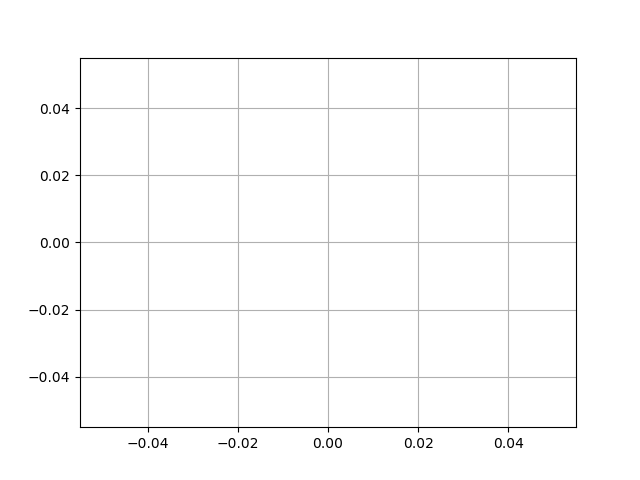

In [57]:
animated_solution(solution.tour)

<IPython.core.display.Javascript object>


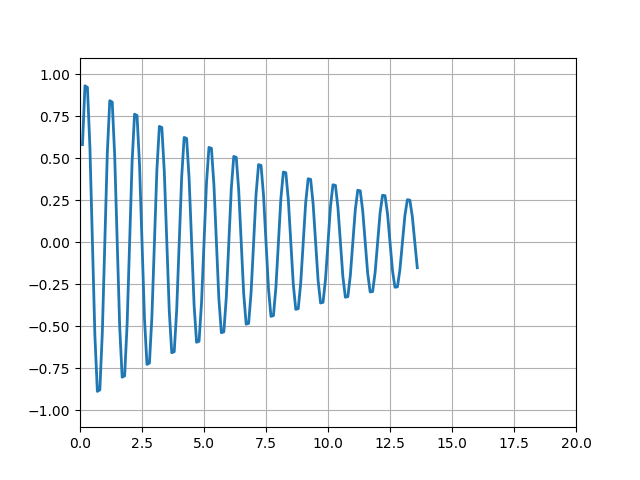

In [38]:
def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()

<IPython.core.display.Javascript object>


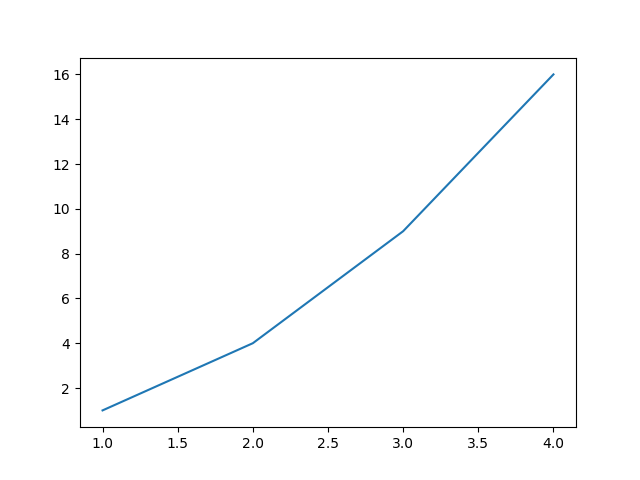

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])